In [ ]:
from google.colab import drive
drive.mount('/content/drive')

%cd drive/MyDrive/'Colab Notebooks'/gan-bending-master

Mounted at /content/drive
/content/drive/MyDrive/Colab Notebooks/gan-bending-master


In [ ]:
!pip install community-events/.

Processing ./community-events
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 258.1/258.1 kB 5.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 519.6/519.6 kB 23.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 29.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.2/42.2 kB 5.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 88.3/88.3 kB 11.9 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 285.7/285.7 kB 28.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 295.0/295.0 kB 31.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 115.3/115.3 kB 14.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.1/194.1 kB 21.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.8/134.8 kB 13.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.7/98.7 kB 14.0 MB/s eta 0:00:00


In [ ]:
!pip install ipdb matplotlib open_clip_torch diffsort

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.5/1.5 MB 18.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 53.1/53.1 kB 6.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 59.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.2/2.2 MB 93.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 76.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 83.1 MB/s eta 0:00:00


In [ ]:
import torch
import torch.nn as nn
import torch.nn.functional as F
from torch.optim import Adam
import torchvision.transforms as T
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt
from tqdm import tqdm
from bendable_gan import BendedGenerator
from bending_modules import BendingConvModule, BendingConvModule_XY, \
    BendingCPPN, BendingDiffSort, BendingDiffSort_XY, ConcatenatedModules
from losses import compute_diversity_loss
from utils import generate_image, image_grid, generate_image_from_seed
from clip import TextPrompt, NCELoss
import gc

%load_ext autoreload
%autoreload 2

device = 'cuda'

/usr/local/lib/python3.10/dist-packages/kornia/augmentation/augmentation.py:1830: DeprecationWarning: GaussianBlur is no longer maintained and will be removed from the future versions. Please use RandomGaussianBlur instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/timm/models/layers/__init__.py:49: DeprecationWarning: Importing from timm.models.layers is deprecated, please import via timm.layers
  warnings.warn(f"Importing from {__name__} is deprecated, please import via timm.layers", DeprecationWarning)


In [ ]:
seeds = [i for i in range(16)]

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
vanillagen = BendedGenerator.from_pretrained("ceyda/butterfly_cropped_uniq1K_512")

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
exampleimgs = [generate_image(vanillagen) for i in range(16)]
# for i, img in enumerate(exampleimgs):
#     img.save(f"butterfly_vanilla_{seeds[i]}.pdf")

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
image_grid(exampleimgs, 4, 4)

## CLIP Loss (+ diversity losses)

In [ ]:
# Create new bending module to optimize
# with CLIP loss

numchans = [1024, 1024, 512, 256, 128, 64, 6]

bending_idx = 5

bendingmod_clip = BendingConvModule(numchans[bending_idx],
                                    act_fn='sin')

bend_generator_clip = BendedGenerator.from_pretrained("ceyda/butterfly_cropped_uniq1K_512",
                                                 bending_module=bendingmod_clip,
                                                 bending_idx=bending_idx,
                                                 train_bending=True)
bend_generator_clip = bend_generator_clip.to(device)


tgt_text = 'A fire burning in a sunflowers field'
# tgt_text = 'A large orange cat lying on the grass'
# tgt_text = 'A white whale swimming in the ocean, view from above'
text_prompt = TextPrompt(tgt_text, device=device)
nce_loss = NCELoss(tgt_text, device=device, temperature=0.01)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
100%|██████████| 1000/1000 [12:33<00:00,  1.33it/s]


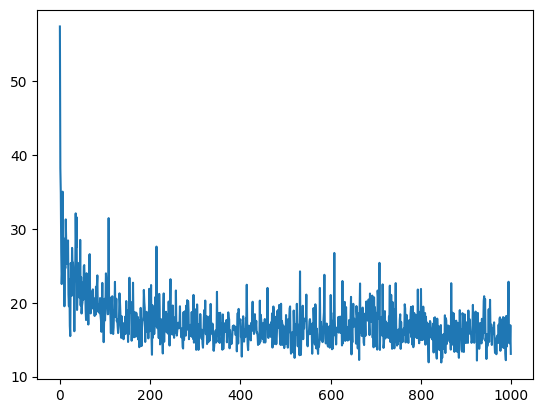

In [ ]:
torch.cuda.empty_cache()

import random
random.seed(23456)
np.random.seed(54321)
torch.manual_seed(12345)

batch_size = 32

n_iter = 1000

div_loss = False
div_weight = 6.
div_loss_clip = True
div_clip_weight = 6.

opt = Adam(bendingmod_clip.parameters(), 1e-3)

loss_log = []

for i in tqdm(range(n_iter)):

    noise_input = torch.randn(batch_size,
                    bend_generator_clip.latent_dim,
                    device=device)

    out, b_in, _ = bend_generator_clip(noise_input, return_inout=True)
    out = out.clamp_(0., 1.)

    if div_loss_clip:
        loss, clip_div = text_prompt(out, diversity=True)
        loss += div_clip_weight * clip_div
    else:
        loss = nce_loss(out) #text_prompt(out)
    if div_loss:
        loss += div_weight * compute_diversity_loss(out, b_in)

    loss_log.append(loss.detach().cpu().numpy())

    with torch.no_grad():
        loss.backward()
        opt.step()
        opt.zero_grad()


plt.plot(range(n_iter), loss_log)

In [ ]:
exampleimgs = [generate_image_from_seed(bend_generator_clip, seed=seeds[i]) for i in range(16)]

ts = tgt_text.replace(" ", "_")
for i, img in enumerate(exampleimgs):
    img.save(f"res/butterfly_clip_2_{ts}_bendindex_{bending_idx}_{i}_t_0.01.pdf")

image_grid(exampleimgs, 4, 4)

In [ ]:
grid = image_grid(exampleimgs, 4, 4)
grid.save(f"res/butterfly_clip_all_2_{ts}_bendindex_{bending_idx}_{i}_t_0.01.jpg", quality=95)
grid.save(f"res/butterfly_clip_all_2_{ts}_bendindex_{bending_idx}_{i}_t_0.01.pdf", quality=95)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
exampleimgs = [generate_image_from_seed(bend_generator_clip, seed=seeds[i]) for i in range(16)]

ts = tgt_text.replace(" ", "_")
for i, img in enumerate(exampleimgs):
    img.save(f"butterfly_clip_{ts}_bendindex_{bending_idx}_{seeds[i]}.pdf")
image_grid(exampleimgs, 4, 4)

In [ ]:
exampleimgs = [generate_image_from_seed(bend_generator_clip, seed=seeds[i]) for i in range(16)]

ts = tgt_text.replace(" ", "_")
for i, img in enumerate(exampleimgs):
    img.save(f"butterfly_clip_{ts}_bendindex_{bending_idx}_{seeds[i]}.pdf")
image_grid(exampleimgs, 4, 4)

In [ ]:
exampleimgs = [generate_image_from_seed(bend_generator_clip, seed=seeds[i]) for i in range(16)]

ts = tgt_text.replace(" ", "_")
for i, img in enumerate(exampleimgs):
    img.save(f"butterfly_clip_{ts}_bendindex_{bending_idx}_{seeds[i]}.pdf")
image_grid(exampleimgs, 4, 4)

In [ ]:
exampleimgs = [generate_image_from_seed(bend_generator_clip, seed=seeds[i]) for i in range(16)]
image_grid(exampleimgs, 4, 4)

In [ ]:
del bendingmod_clip, bend_generator_clip, text_prompt, nce_loss, noise_input#, b_in, b_out

gc.collect()
torch.cuda.empty_cache()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


## Convolutional with coordinates

In [ ]:
# Create new bending module to optimize
# with CLIP loss

device = 'cuda'
numchans = [1024, 1024, 512, 256, 128, 64, 6]
inputsizes = [8, 16, 32, 64, 128, 256, 512]

bending_idx = 5

bendingmod_clip = BendingConvModule_XY(numchans[bending_idx],
                                       inputsizes[bending_idx])

bend_generator_clip = BendedGenerator.from_pretrained("ceyda/butterfly_cropped_uniq1K_512",
                                                 bending_module=bendingmod_clip,
                                                 bending_idx=bending_idx,
                                                 train_bending=True)
bend_generator_clip = bend_generator_clip.to(device)

tgt_text = 'A fire burning in a sunflowers field'
#text_prompt = TextPrompt(tgt_text, device=device)
nce_loss = NCELoss(tgt_text, temperature=0.01, device=device)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
100%|██████████| 2000/2000 [27:26<00:00,  1.21it/s]


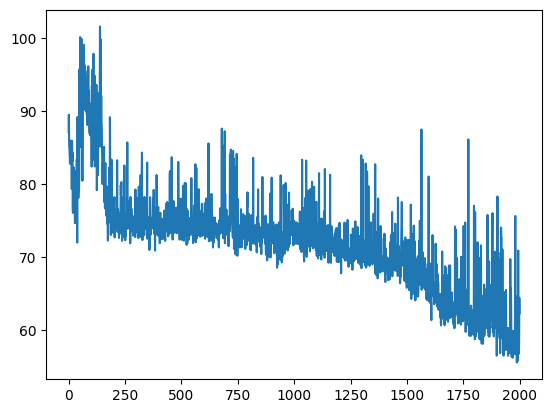

In [ ]:
torch.cuda.empty_cache()

torch.manual_seed(12345)

batch_size = 32

n_iter = 2000

opt = Adam(bendingmod_clip.parameters(), 1e-3)

loss_log = []

for i in tqdm(range(n_iter)):

    noise_input = torch.randn(batch_size,
                    bend_generator_clip.latent_dim,
                    device=device)

    out = bend_generator_clip(noise_input)
    out = out.clamp_(0., 1.)


    loss = nce_loss(out)
    loss_log.append(loss.detach().cpu().numpy())

    with torch.no_grad():
        loss.backward()
        opt.step()
        opt.zero_grad()


plt.plot(range(n_iter), loss_log)

In [ ]:
exampleimgs = [generate_image_from_seed(bend_generator_clip, seed=seeds[i]) for i in range(16)]

ts = tgt_text.replace(" ", "_")
for i, img in enumerate(exampleimgs):
    img.save(f"results_seed/butterfly_XY_{ts}_bendindex_{bending_idx}_{i}.pdf")

image_grid(exampleimgs, 4, 4)

In [ ]:
grid = image_grid(exampleimgs, 4, 4)
grid.save(f"results_seed/butterfly_XY_all_{ts}_bendindex_{bending_idx}_{i}.jpg", quality=95)
# grid.save(f"results_seed/butterfly_clip_{ts}_bendindex_{bending_idx}_{i}.pdf", quality=95)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
del bendingmod_clip, bend_generator_clip, nce_loss, noise_input#, b_in, b_out
import gc
gc.collect()
torch.cuda.empty_cache()

## Differentiable sorting

In [ ]:
# Create new bending module to optimize
# with CLIP loss

numchans = [1024, 1024, 512, 256, 128, 64, 6]
inputsizes = [8, 16, 32, 64, 128, 256, 512]

bending_idx = 3

bendingmod_clip = BendingConvModule(numchans[bending_idx],
                                    act_fn='relu')
bendsorting_clip = BendingDiffSort_XY(numchans[bending_idx],
                                   inputsizes[bending_idx],
                                   perm_rows=True, perm_cols=False)
combined_bendmodule = ConcatenatedModules([bendsorting_clip, bendingmod_clip])

In [ ]:
bend_generator_sort = BendedGenerator.from_pretrained("ceyda/butterfly_cropped_uniq1K_512",
                                                 bending_module=combined_bendmodule,
                                                 bending_idx=bending_idx,
                                                 train_bending=True)
bend_generator_sort = bend_generator_sort.to(device)

tgt_text = 'A fire burning in a sunflowers field'
text_prompt = TextPrompt(tgt_text, device=device)
nce_loss = NCELoss(tgt_text, device=device, temperature=0.01)

In [ ]:
torch.cuda.empty_cache()

import random
random.seed(23456)
np.random.seed(54321)
torch.manual_seed(12345)
#torch.use_deterministic_algorithms(True, warn_only=True)

batch_size = 16

n_iter = 1000

div_loss = False
div_weight = 6.
div_loss_clip = False
div_clip_weight = 6.

opt = Adam(combined_bendmodule.parameters(), 1e-4)

loss_log = []

for i in tqdm(range(n_iter)):

    noise_input = torch.randn(batch_size,
                    bend_generator_sort.latent_dim,
                    device=device)

    out, b_in, _ = bend_generator_sort(noise_input, return_inout=True)
    out = out.clamp_(0., 1.)

    if div_loss_clip:
        loss, clip_div = text_prompt(out, diversity=True)
        loss += div_clip_weight * clip_div
    else:
        loss = nce_loss(out) #text_prompt(out)
    if div_loss:
        loss += div_weight * compute_diversity_loss(out, b_in)

    loss_log.append(loss.detach().cpu().numpy())

    with torch.no_grad():
        loss.backward()
        opt.step()
        opt.zero_grad()


plt.plot(range(n_iter), loss_log)

In [ ]:
exampleimgs = [generate_image_from_seed(bend_generator_sort, seed=seeds[i]) for i in range(16)]
image_grid(exampleimgs, 4, 4)
ts = tgt_text.replace(" ", "_")
for i, img in enumerate(exampleimgs):
    img.save(f"butterfly_diffsort_clip_{ts}_bendindex_{bending_idx}_{seeds[i]}.pdf")
image_grid(exampleimgs, 4, 4)

In [ ]:
exampleimgs = [generate_image_from_seed(bend_generator_sort, seed=seeds[i]) for i in range(16)]
image_grid(exampleimgs, 4, 4)
for i, img in enumerate(exampleimgs):
    img.save(f"butterfly_diffsort_clip_{ts}_bendindex_{bending_idx}_{seeds[i]}.pdf")
image_grid(exampleimgs, 4, 4)

In [ ]:
exampleimgs = [generate_image_from_seed(bend_generator_sort, seed=seeds[i]) for i in range(16)]
image_grid(exampleimgs, 4, 4)
for i, img in enumerate(exampleimgs):
    img.save(f"butterfly_diffsort_clip_{ts}_bendindex_{bending_idx}_{seeds[i]}.pdf")
image_grid(exampleimgs, 4, 4)

In [ ]:
exampleimgs = [generate_image_from_seed(bend_generator_sort, seed=seeds[i]) for i in range(16)]
image_grid(exampleimgs, 4, 4)

In [ ]:
exampleimgs = [generate_image_from_seed(bend_generator_sort, seed=seeds[i]) for i in range(16)]
image_grid(exampleimgs, 4, 4)

In [ ]:
exampleimgs = [generate_image_from_seed(bend_generator_sort, seed=seeds[i]) for i in range(16)]
image_grid(exampleimgs, 4, 4)

In [ ]:
del combined_bendmodule, bend_generator_sort, text_prompt, nce_loss, noise_input#, b_in, b_out
import gc
gc.collect()
torch.cuda.empty_cache()

In [ ]:
exampleimgs = [generate_image(bend_generator_sort) for _ in range(16)]
image_grid(exampleimgs, 4, 4)

In [ ]:
exampleimgs = [generate_image(bend_generator_sort) for _ in range(16)]
image_grid(exampleimgs, 4, 4)

In [ ]:
exampleimgs = [generate_image(bend_generator_sort) for _ in range(16)]
image_grid(exampleimgs, 4, 4)

In [ ]:
exampleimgs = [generate_image(bend_generator_sort) for _ in range(16)]
image_grid(exampleimgs, 4, 4)

In [ ]:
exampleimgs = [generate_image(bend_generator_sort) for _ in range(16)]
image_grid(exampleimgs, 4, 4)

In [ ]:
exampleimgs = [generate_image(bend_generator_sort) for _ in range(16)]
image_grid(exampleimgs, 4, 4)

## Control: does diff. sorting do better than random permutation?

In [ ]:
# Create new bending module to optimize
# with CLIP loss

numchans = [1024, 1024, 512, 256, 128, 64, 6]
inputsizes = [8, 16, 32, 64, 128, 256, 512]

bending_idx = 1

bendingmod_clip = BendingConvModule(numchans[bending_idx],
                                    act_fn='relu')
perm_h = torch.randperm(inputsizes[bending_idx])

In [ ]:
perm_h

In [ ]:
bend_generator_sort = BendedGenerator.from_pretrained("ceyda/butterfly_cropped_uniq1K_512",
                                                 bending_module=bendingmod_clip,
                                                 bending_idx=bending_idx,
                                                 train_bending=True)
bend_generator_sort = bend_generator_sort.to(device)

tgt_text = 'Peaches in a greek temple, 8-bit art'
text_prompt = TextPrompt(tgt_text, device=device)
nce_loss = NCELoss(tgt_text, device=device, temperature=0.1)

In [ ]:
torch.cuda.empty_cache()

batch_size = 16

n_iter = 1000

div_loss = False
div_weight = 6.
div_loss_clip = False
div_clip_weight = 6.

opt = Adam(bendingmod_clip.parameters(), 1e-4)

loss_log = []

for i in tqdm(range(n_iter)):

    noise_input = torch.randn(batch_size,
                    bend_generator_sort.latent_dim,
                    device=device)

    out = bend_generator_sort(noise_input, perm_h=perm_h)
    out = out.clamp_(0., 1.)

    if div_loss_clip:
        loss, clip_div = text_prompt(out, diversity=True)
        loss += div_clip_weight * clip_div
    else:
        loss = nce_loss(out) #text_prompt(out)

    loss_log.append(loss.detach().cpu().numpy())

    with torch.no_grad():
        loss.backward()
        opt.step()
        opt.zero_grad()


plt.plot(range(n_iter), loss_log)

In [ ]:
exampleimgs = [generate_image(bend_generator_sort) for _ in range(16)]
image_grid(exampleimgs, 4, 4)

In [ ]:
x, y = torch.meshgrid(torch.arange(32),
                      torch.arange(32),
                      indexing='xy')

In [ ]:
plt.matshow(x.numpy())

In [ ]:
plt.matshow(y.numpy())

In [ ]:
sinx = torch.sin(x)

In [ ]:
plt.matshow(sinx.numpy())

In [ ]:
siny = torch.cos(y)
plt.matshow(siny.numpy())